# Topological optimization of power grids

Let us reconfigure the distribution of a network for loss minimization while maintaining the service quality within regulatory limits. This could be part of routine operations or in response to specific events like changes in demand patterns, outages, or integration of renewable generation sources.

### Common Steps
1. Data Gathering and System Modeling: The DSO collects data from various parts of the grid, including substations, transformers, distribution lines, and load data from smart meters. This data is used to build a detailed model of the network in a power system analysis tool like pandapower.

2. Initial Load Flow Analysis: Before any optimization, an initial load flow analysis is performed to understand the current state of the system—voltages at each bus, power flows on lines, losses, etc.

3. Defining Optimization Goals and Constraints: The optimization goals could include minimizing power losses, improving voltage profiles, or reducing peak loads. Constraints would be set according to regulatory requirements, physical limits of the network components, and operational safety margins.

4. Optimization Algorithm Implementation: An algorithm is chosen based on the complexity of the problem and the desired speed of solution. Common algorithms include heuristic methods, genetic algorithms, or other metaheuristic optimization techniques.

5. Scenario Analysis and Decision Making: The algorithm is used to run multiple scenarios of topological changes, such as opening or closing circuit breakers or reconfiguring network connections. The outcomes are analyzed to determine which scenario provides the best improvement in performance according to the defined goals.

6. Verification and Implementation of Actions: Once the optimal configuration is identified, it's verified for safety and reliability before being implemented. The network reconfiguration is then carried out physically by operating switches, circuit breakers, and other controllable devices.

In [1]:
import pandapower as pp
import numpy as np

# Create an empty network
net = pp.create_empty_network()

# Create buses
bus1 = pp.create_bus(net, vn_kv=20.)
bus2 = pp.create_bus(net, vn_kv=0.4)
bus3 = pp.create_bus(net, vn_kv=0.4)

# Create bus elements
pp.create_ext_grid(net, bus=bus1, vm_pu=1.02, va_degree=50)
pp.create_load(net, bus=bus2, p_mw=0.1, q_mvar=0.05)
pp.create_sgen(net, bus=bus3, p_mw=0.1, q_mvar=0.05)

# Create lines
line1 = pp.create_line(net, from_bus=bus1, to_bus=bus2, length_km=0.1, std_type="NAYY 4x50 SE")
line2 = pp.create_line(net, from_bus=bus1, to_bus=bus3, length_km=0.1, std_type="NAYY 4x50 SE")
line3 = pp.create_line(net, from_bus=bus2, to_bus=bus3, length_km=0.1, std_type="NAYY 4x50 SE", in_service=False)  # initially out of service

# Perform initial power flow
pp.runpp(net)

# Print initial losses
initial_losses = net.res_line['pl_mw'].sum()
print(f"Initial losses: {initial_losses} MW")

# Optimization: try closing the line3 switch and check if losses decrease
net.line.at[line3, 'in_service'] = True
pp.runpp(net)
new_losses = net.res_line['pl_mw'].sum()

# Check if there is an improvement
if new_losses < initial_losses:
    print(f"Reconfiguring the network reduced losses to: {new_losses} MW")
else:
    print(f"Reconfiguring the network increased losses to: {new_losses} MW, reverting changes")
    net.line.at[line3, 'in_service'] = False

# Final power flow to confirm the best configuration
pp.runpp(net)

# Show results
print(net.res_line)
print(net.res_bus)


Initial losses: 3.85727104541822e-06 MW
Reconfiguring the network reduced losses to: 3.854188988653727e-06 MW
   p_from_mw  q_from_mvar  p_to_mw  q_to_mvar         pl_mw   ql_mvar  \
0   0.099922     0.047214 -0.09992  -0.049959  1.904448e-06 -0.002745   
1  -0.099918    -0.052706  0.09992   0.049961  1.946660e-06 -0.002745   
2  -0.000080    -0.000041  0.00008   0.000039  3.080421e-09 -0.000001   

   i_from_ka   i_to_ka      i_ka  vm_from_pu  va_from_degree  vm_to_pu  \
0   0.003128  0.158086  0.158086    1.020000       50.000000  1.019983   
1   0.003197  0.158081  0.158081    1.020000       50.000000  1.020017   
2   0.000127  0.000126  0.000127    1.019983       50.000315  1.020017   

   va_to_degree  loading_percent  
0     50.000315       111.328086  
1     49.999660       111.324918  
2     49.999660         0.089307  
      vm_pu  va_degree      p_mw    q_mvar
0  1.020000  50.000000 -0.000004  0.005492
1  1.019983  50.000315  0.100000  0.050000
2  1.020017  49.999660 -0.10000

No or insufficient geodata available --> Creating artificial coordinates. This may take some time


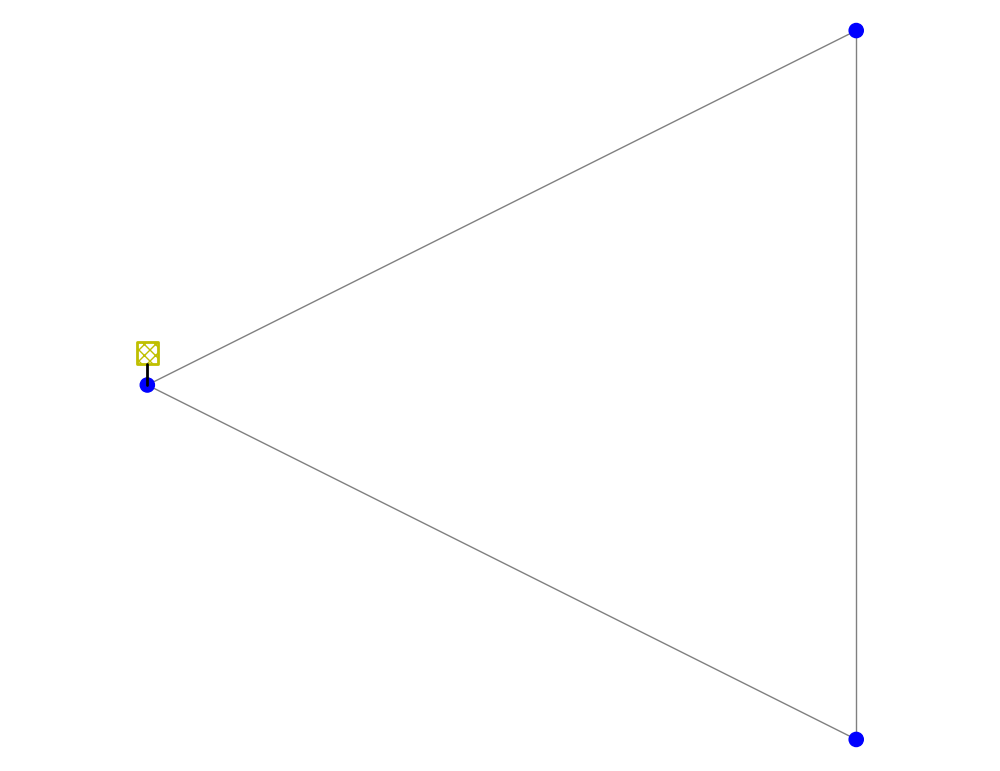

<Axes: >

In [4]:
plot.simple_plot(net)

In [3]:
import pandapower.plotting as plot

# ... (after running power flow analysis)

# Simple plot of the network
plot.simple_plot(net, show=True)

# Load and generation distribution
plot.create_bus_collection(net, net.bus.index, size=0.1, color="b", zorder=10)
plot.create_line_collection(net, net.line.index, linewidths=1.5, linestyles='solid', color="grey", use_bus_geodata=True)
plot.draw_collections([plot.create_bus_collection(net, net.bus.index), plot.create_line_collection(net, net.line.index)], figsize=(8,6))

# Optionally, you can plot with geographic coordinates if you have them
# plot.geo_plot(net)

# Voltage profile plot
bus_voltages = net.res_bus.vm_pu
plot.voltage_profile(net, plot_type="bar")

# Line loading plot
line_loadings = net.res_line.loading_percent
plot.create_line_loading_collection(net, net.line.index, zorder=2)


TypeError: simple_plot() got an unexpected keyword argument 'show'

In [ ]:
import pandapower
import pandapower.networks
import pandapower.topology
import pandapower.plotting
import pandapower.converter
import pandapower.estimation

In [ ]:
import pandapower.test
pandapower.test.run_all_tests()